#### Installing the Pytorch library

In [1]:
!pip install torch

#### Importing torch and its various sub-packages to import dataloader, datasets and transforms. Using sklearn to import train-test split and shuffle functions

In [2]:
import os
import random
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image  # You can use PIL to open images
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#### (1) Unzipping the available dataset file

In [3]:
!unzip /content/Dataset_Available.zip

Archive:  /content/Dataset_Available.zip
   creating: Dataset_Available/Aaron_Eckhart/
  inflating: Dataset_Available/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: Dataset_Available/Aaron_Guiel/
  inflating: Dataset_Available/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: Dataset_Available/Aaron_Patterson/
  inflating: Dataset_Available/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: Dataset_Available/Aaron_Peirsol/
  inflating: Dataset_Available/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: Dataset_Available/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: Dataset_Available/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: Dataset_Available/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
   creating: Dataset_Available/Aaron_Pena/
  inflating: Dataset_Available/Aaron_Pena/Aaron_Pena_0001.jpg  
   creating: Dataset_Available/Aaron_Sorkin/
  inflating: Dataset_Available/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: Dataset_Available/Aaron_Sorkin/Aaron_Sorkin_0002.jpg

#### Checking the height and width of any one of the images so as to resize it for input in Resnet18 model

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = cv2.imread("/content/Dataset_Available/Ahmed_Ibrahim_Bilal/Ahmed_Ibrahim_Bilal_0001.jpg")
height, width, _ = image.shape
# from IPython.display import Image, display

# display(Image(filename='/content/Dataset_Available/Ahmed_Ibrahim_Bilal/Ahmed_Ibrahim_Bilal_0001.jpg'))
print(f"Width: {width}, Height: {height}")

Width: 250, Height: 250


#### (2) Get the number of persons with more than one image

In [5]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

data_dir = '/content/Dataset_Available'
person_to_images = {} # Stores the folder name as key and image names as values in form of dictionary

for person in os.listdir(data_dir):
    person_images = os.listdir(os.path.join(data_dir, person))
    if len(person_images) > 1: # Checks if there are more than 1 images in a folder
        person_to_images[person] = person_images

In [6]:
print(person_to_images['Aaron_Peirsol'])

['Aaron_Peirsol_0004.jpg', 'Aaron_Peirsol_0002.jpg', 'Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol_0001.jpg']


In [9]:
persons = list(person_to_images.keys()) # Prints the name of the folders with multiple images
print(persons)

['Ali_Khamenei', 'Ai_Sugiyama', 'Abdullah_Gul', 'Adrian_Nastase', 'Alan_Greenspan', 'Aicha_El_Ouafi', 'Aaron_Peirsol', 'Aleksander_Kwasniewski', 'Abdullatif_Sener', 'Allen_Iverson', 'Alec_Baldwin', 'Akbar_Hashemi_Rafsanjani', 'Alex_Penelas', 'Alice_Fisher', 'Alexander_Downer', 'Adrien_Brody', 'Alexander_Rumyantsev', 'Abdullah', 'Al_Sharpton', 'Alejandro_Toledo', 'Al_Gore', 'Aitor_Gonzalez', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Albert_Costa', 'Adolfo_Rodriguez_Saa', 'Alberto_Fujimori', 'Al_Pacino', 'Allison_Janney', 'Ahmet_Necdet_Sezer', 'Allyson_Felix', 'Alastair_Campbell', 'Alexandra_Stevenson', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Alexander_Losyukov', 'Ali_Naimi', 'Adam_Scott', 'Albrecht_Mentz', 'Alejandro_Avila', 'Ahmed_Chalabi', 'Alberto_Ruiz_Gallardon', 'Akhmed_Zakayev', 'Aldo_Paredes', 'Alex_Sink', 'Alan_Mulally', 'Alan_Ball', 'Alex_Barros', 'Aaron_Sorkin', 'Abdullah_al-Attiyah', 'Alejandro_Atchugarry', 'Ahmad_Masood', 'Adam_Sandler', 'Alexandra_Vodjanikova', 'Al_Davis', 'Alicia

#### (3) Split the dataset into training, validation, and testing by person


In [8]:
persons = list(person_to_images.keys()) # Taking only the persons having multiple images for training, testing and validation
train_persons, val_test_persons = train_test_split(persons, test_size=0.3, random_state=42)
val_persons, test_persons = train_test_split(val_test_persons, test_size=0.5, random_state=42)

#### The names of persons whose images would be used for training

In [10]:
print(train_persons)

['Abdullatif_Sener', 'Aaron_Peirsol', 'Alexandra_Stevenson', 'Alan_Greenspan', 'Alan_Ball', 'Alejandro_Toledo', 'Alexandra_Vodjanikova', 'Adam_Scott', 'Al_Davis', 'Akhmed_Zakayev', 'Adolfo_Aguilar_Zinser', 'Adrien_Brody', 'Alberto_Ruiz_Gallardon', 'Allison_Janney', 'Al_Pacino', 'Adolfo_Rodriguez_Saa', 'Alan_Mulally', 'Akbar_Hashemi_Rafsanjani', 'Abdel_Nasser_Assidi', 'Abel_Pacheco', 'Alex_Sink', 'Albrecht_Mentz', 'Allyson_Felix', 'Alex_Barros', 'Ai_Sugiyama', 'Aitor_Gonzalez', 'Abdullah_Gul', 'Alejandro_Atchugarry', 'Ahmed_Chalabi', 'Ali_Naimi', 'Albert_Costa', 'Ali_Abbas', 'Alec_Baldwin', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Al_Sharpton', 'Adrian_McPherson', 'Al_Gore', 'Aleksander_Kwasniewski', 'Aldo_Paredes', 'Alexander_Downer', 'Ahmet_Necdet_Sezer', 'Adam_Sandler', 'Alejandro_Avila']


#### Create a folder named "Train_Dataset" which contains all the folders with images which would be used in training

In [11]:
import shutil
data_dir = '/content/Dataset_Available'

# Define the path where we want to create the new folder
new_data_dir = '/content/Train_Dataset'

# Create the new data directory if it doesn't exist
if not os.path.exists(new_data_dir):
    os.makedirs(new_data_dir)

# Iterate through the persons in the train_persons list and copy their folders
for person in train_persons:
    person_folder = os.path.join(new_data_dir, person)
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)
    person_source_folder = os.path.join(data_dir, person)

    # Copy all the images from the source folder to the new folder
    for image_file in os.listdir(person_source_folder):
        source_path = os.path.join(person_source_folder, image_file)
        destination_path = os.path.join(person_folder, image_file)
        shutil.copyfile(source_path, destination_path)

print("New dataset created in", new_data_dir)
#This code will create a new directory structure where each person's folder from the train_persons list is copied to the new data directory. You can replace '/content/New_Dataset' with your desired location for the new dataset.

New dataset created in /content/Train_Dataset


#### Create a folder named "Val_Dataset" which contains all the folders with images which would be used in validation

In [12]:
new_data_dir = '/content/Val_Dataset'  # Replace with the desired location

# Create the new data directory if it doesn't exist
if not os.path.exists(new_data_dir):
    os.makedirs(new_data_dir)

# Iterate through the persons in the train_persons list and copy their folders
for person in val_persons:
    person_folder = os.path.join(new_data_dir, person)
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)
    person_source_folder = os.path.join(data_dir, person)

    # Copy all the images from the source folder to the new folder
    for image_file in os.listdir(person_source_folder):
        source_path = os.path.join(person_source_folder, image_file)
        destination_path = os.path.join(person_folder, image_file)
        shutil.copyfile(source_path, destination_path)

print("New dataset created in", new_data_dir)

New dataset created in /content/Val_Dataset


#### Create a folder named "Test_Dataset" which contains all the folders with images which would be used in testing

In [14]:
new_data_dir = '/content/Test_Dataset'  # Replace with the desired location

# Create the new data directory if it doesn't exist
if not os.path.exists(new_data_dir):
    os.makedirs(new_data_dir)

# Iterate through the persons in the train_persons list and copy their folders
for person in test_persons:
    person_folder = os.path.join(new_data_dir, person)
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)
    person_source_folder = os.path.join(data_dir, person)

    # Copy all the images from the source folder to the new folder
    for image_file in os.listdir(person_source_folder):
        source_path = os.path.join(person_source_folder, image_file)
        destination_path = os.path.join(person_folder, image_file)
        shutil.copyfile(source_path, destination_path)

print("New dataset created in", new_data_dir)

New dataset created in /content/Test_Dataset


In [15]:
!pip install torch torchvision


#### Control the behavior of the CuDNN (CUDA Deep Neural Network) library, which is a GPU-accelerated library for deep neural networks commonly used with PyTorch

In [16]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

#### Defines a PyTorch dataset, SiameseDataset, for Siamese network training, generating pairs of images from the specified folder and labeling them as either "Same person" (label 1) or "Different persons" (label 0), suitable for similarity-based learning tasks.

In [17]:
class SiameseDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.transform = transform
        self.pairs, self.labels = self.generate_pairs_labels()

    def generate_pairs_labels(self): # This function generates pairs of same images with label 1 and pairs of different images with label 0
        pairs = []
        labels = []
        for person in os.listdir(self.image_folder):
            person_path = os.path.join(self.image_folder, person)
            if os.path.isdir(person_path):
                images = os.listdir(person_path)
                for i in range(len(images)):
                    for j in range(i + 1, len(images)):
                        pairs.append((os.path.join(person_path, images[i]), os.path.join(person_path, images[j])))
                        labels.append(1)  # Same person
        for person1 in os.listdir(self.image_folder):
          for person2 in os.listdir(self.image_folder):
                if person1 != person2: # Checking whether folder is same or different as need to assign label 0
                    person1_path = os.path.join(self.image_folder, person1)
                    person2_path = os.path.join(self.image_folder, person2)
                    images1 = os.listdir(person1_path)
                    images2 = os.listdir(person2_path)
                    for i in range(len(images1)):
                        for j in range(len(images2)):
                            pairs.append((os.path.join(person1_path, images1[i]), os.path.join(person2_path, images2[j])))
                            labels.append(0)  # Different persons
        return pairs, labels # Returns the pairs with their corresponding labels
    def __len__(self):
        return len(self.pairs) # Returns the number of pairs present

    def __getitem__(self, idx): # This function retrieves and preprocesses a pair of images from the dataset,
        img1_path, img2_path = self.pairs[idx]# applies a specified transformation, and returns the pair of images along with their associated label

        img1 = Image.open(img1_path)
        img2 = Image.open(img2_path)

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        label = torch.Tensor([self.labels[idx]]).float()

        return img1, img2, label

#### (5)Define image preprocessing transformations like for input to Resnet18 we need a tensor of 224 * 224 * 3 so it resizes and converts it to tensor followed by normalization


In [18]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#### (6a) Define image transformations with augementation like it roates, flips horizonatlly and apply jitters for input image to Resnet18 and converts it to tensor followed by normalization

In [19]:
data_transforms_with_Augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
train_data_folder = '/content/Train_Dataset'
val_data_folder = '/content/Val_Dataset'
test_data_folder = '/content/Test_Dataset'
siamese_train_dataset = SiameseDataset(train_data_folder, transform=data_transforms_with_Augmentation)
batch_size = 32

siamese_val_dataset = SiameseDataset(val_data_folder, transform=transform)
siamese_test_dataset = SiameseDataset(test_data_folder, transform=transform)

In [21]:
print(len(siamese_train_dataset))

39818


#### Taking only a random subset of the training dataset for input to the model



In [22]:
from torch.utils.data import Subset
num_pairs_to_keep = 400  # Adjust the desired number of pairs
selected_indices = random.sample(range(len(siamese_train_dataset)), num_pairs_to_keep)
limited_siamese_train_dataset = Subset(siamese_train_dataset, selected_indices)

#### Taking only a random subset of validation dataset to validate model's performance

In [23]:
num_pairs_to_keep = 200  # Adjust the desired number of pairs
selected_indices = random.sample(range(len(siamese_val_dataset)), num_pairs_to_keep)
limited_siamese_val_dataset = Subset(siamese_val_dataset, selected_indices)

#### Taking only a random subset of test dataset to test model's performance

In [24]:
num_pairs_to_keep = 300  # Adjust the desired number of pairs
selected_indices = random.sample(range(len(siamese_test_dataset)), num_pairs_to_keep)
limited_siamese_test_dataset = Subset(siamese_test_dataset, selected_indices)

#### Using the Dataloader function to load data for the limited train, validate and test datasets with variable batch_size and shuffle = True

In [25]:
train_dataloader = DataLoader(limited_siamese_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(limited_siamese_val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(limited_siamese_test_dataset, batch_size=batch_size, shuffle=True)


#### Defines a Siamese network in PyTorch, where both input1 and input2 are processed through the same base model (shared weights), and the network produces two sets of outputs (output1 and output2) for the two inputs, facilitating similarity comparison between them.

In [26]:
class SiameseNetwork(nn.Module):
    def __init__(self, base_model):
        super(SiameseNetwork, self).__init__()
        self.base_model = base_model

    def forward_one(self, x):
        return self.base_model(x)

    def forward(self, input1, input2):
        output1 = self.forward_one(input1)
        output2 = self.forward_one(input2)
        return output1, output2

#### (4a) Loads a pre-trained ResNet-18 model, retains its convolutional layers, and replaces the fully connected layer to adapt it for binary classification with two output classes

In [27]:
# Load a pre-trained ResNet-18 model as the base model
base_model = models.resnet18(pretrained=True)
num_features = base_model.fc.in_features
# Modify the fully connected layer to match the desired output size (2 for binary classification)
base_model.fc = nn.Linear(num_features, 2)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.0MB/s]


#### Defines an object with ResNet18 using siamese network class

In [28]:
siamese_net = SiameseNetwork(base_model)

In [29]:
import torch.nn.functional as F

#### Defines a custom contrastive loss function that computes the loss based on the Euclidean distance between pairs of embeddings (output1 and output2) and the ground truth labels (label), enforcing a margin between similar and dissimilar pairs.

In [30]:
# Define the contrastive loss for Siamese network training
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0): # Default margin set to 2.0
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

#### Defines a custom contrastive loss function that computes the loss based on the cosine similarity between pairs of embeddings (output1 and output2) and the ground truth labels (label), encouraging similarity for labeled pairs and dissimilarity for unlabeled pairs while enforcing a margin.

In [31]:
class ContrastiveLossWithCosine(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLossWithCosine, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        cosine_similarity = F.cosine_similarity(output1, output2)
        loss_contrastive = label * -torch.log(cosine_similarity) + (1 - label) * -torch.log(1 - cosine_similarity)
        loss_contrastive = torch.mean(loss_contrastive)
        return loss_contrastive

#### We can choose the loss function to use in training from the 2 options available

In [32]:
criterion = ContrastiveLoss()

#### Using Adam as the 1st optimizer

In [33]:
optimizerA = optim.Adam(siamese_net.parameters(), lr=0.0005)

#### Using SGD as a 2nd option

In [34]:
optimizerB = optim.SGD(siamese_net.parameters(), lr=0.001)

### We train the model siamese_net model using various combinations of Optimizers and learning rate schedulers

#### (6b)StepLR as learning rate scheduler and OptimizerA i.e. Adam in this code block. Also L2 regularization has been used to prevent overfitting with suitable lambda_l2

In [ ]:
from PIL import Image
from torch.optim import lr_scheduler
# Training the Siamese network
num_epochs = 10
lambda_l2 = 0.003
scheduler = lr_scheduler.StepLR(optimizerA, step_size=4, gamma=0.5)

for epoch in range(num_epochs):
    siamese_net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs1, inputs2, labels = data
        optimizerA.zero_grad()
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        loss = criterion(outputs1, outputs2, labels)
        l2_regularization = 0.0
        for param in siamese_net.parameters():
            l2_regularization += torch.norm(param, 2)  # L2 norm of model parameters

        # Add L2 regularization term to the loss
        loss += lambda_l2 * l2_regularization
        loss.backward()
        optimizerA.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

KeyboardInterrupt: ignored

#### StepLR as learning rate scheduler and OptimizerB i.e. SGD in this code block. Also L2 regularization has been used to prevent overfitting with suitable lambda_l2

In [ ]:
from PIL import Image
from torch.optim import lr_scheduler
# Training the Siamese network
num_epochs = 10
lambda_l2 = 0.003
scheduler = lr_scheduler.StepLR(optimizerA, step_size=4, gamma=0.5)

for epoch in range(num_epochs):
    siamese_net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs1, inputs2, labels = data
        optimizerB.zero_grad()
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        loss = criterion(outputs1, outputs2, labels)
        l2_regularization = 0.0
        for param in siamese_net.parameters():
            l2_regularization += torch.norm(param, 2)  # L2 norm of model parameters

        # Add L2 regularization term to the loss
        loss += lambda_l2 * l2_regularization
        loss.backward()
        optimizerB.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

Epoch 1, Loss: 1.8785351056319017
Epoch 2, Loss: 1.8239924815984874
Epoch 3, Loss: 1.7160275074151845
Epoch 4, Loss: 1.7101552761518037
Epoch 5, Loss: 1.69119498362908
Epoch 6, Loss: 1.667201353953435
Epoch 7, Loss: 1.629741201033959
Epoch 8, Loss: 1.6313895353904138
Epoch 9, Loss: 1.6277378155634954
Epoch 10, Loss: 1.6170539947656484


#### In this case a scheduler which reduces by a factor when the validation loss plateaus is used along with OptimizerB i.e. SGD. Also L1 regularization is used along with L2 regularization with variable constants

In [ ]:
from torch.optim import lr_scheduler

# Training loop
num_epochs = 10 # We can vary the number of epochs
lambda_l2 = 0.003
lambda_l1 = 0.004
scheduler = lr_scheduler.ReduceLROnPlateau(optimizerB, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(num_epochs):
    # Training code here
    siamese_net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs1, inputs2, labels = data
        optimizerB.zero_grad()
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        loss = criterion(outputs1, outputs2, labels) # Loss based on the loss function we choose above
        l2_regularization = 0.0
        l1_regularization = 0.0
        for param in siamese_net.parameters():
            l2_regularization += torch.norm(param, 2)  # L2 norm of model parameters
            l1_regularization += torch.norm(param, 1)  # L1 norm of model parameters
        # Add L2 and L1 regularization term to the loss(Elastic Net Regularization)
        loss += lambda_l2 * l2_regularization + lambda_l1 * l1_regularization
        loss.backward()
        optimizerB.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")
    # Validation loop
    siamese_net.eval()
    validation_loss = 0.0

    with torch.no_grad():
        for j, data_val in enumerate(val_dataloader, 0):
            inputs1, inputs2, labels = data_val
            outputs1, outputs2 = siamese_net(inputs1, inputs2)
            loss = criterion(outputs1, outputs2, labels)
            validation_loss += loss.item()

    # Provide the validation loss to the scheduler
    scheduler.step(validation_loss) # Scheduler decides the learning rate based on the validation loss provided
    print(f"Epoch {epoch + 1}, Validation_Loss: {validation_loss / (j + 1)}")

    # Optionally, you can monitor the learning rate
    print(f'Epoch {epoch + 1}, Learning Rate: {optimizerB.param_groups[0]["lr"]}')

# After training, you can use the model for inference


672.9606323242188
1345.6432495117188
2018.3185424804688
2690.5913696289062
3362.7723388671875
4034.7603149414062
4706.507568359375
5378.2447509765625
6049.672668457031
6721.0084228515625
7392.0709228515625
8062.9591064453125
8733.625244140625
Epoch 1, Loss: 671.8173264723557
Epoch 1, Validation_Loss: 0.34925335219928194
Epoch 1, Learning Rate: 0.001
670.5845336914062
1341.006103515625
2011.3411254882812
2681.4976806640625
3351.3914794921875
4021.0936279296875
4690.4788818359375
5359.750915527344
6028.744567871094
6697.583312988281
7366.275390625
8034.7408447265625
8703.103393554688
Epoch 2, Loss: 669.469491811899
Epoch 2, Validation_Loss: 0.32917191088199615
Epoch 2, Learning Rate: 0.001
668.1793212890625
1336.0847778320312
2003.9523315429688
2671.706787109375
3339.09033203125
4006.4138793945312
4673.5181884765625
5340.486511230469
6007.186279296875
6673.6956787109375
7340.080871582031
8006.258972167969
8672.247619628906
Epoch 3, Loss: 667.0959707406851
Epoch 3, Validation_Loss: 0.3032

#### In this case a scheduler which reduces by a factor when the validation loss plateaus is used along with OptimizerA i.e. Adam. Also L1 regularization is used along with L2 regularization with variable constants

In [35]:
from torch.optim import lr_scheduler

# Training loop
num_epochs = 10 # We can vary the number of epochs
lambda_l2 = 0.003
lambda_l1 = 0.004
scheduler = lr_scheduler.ReduceLROnPlateau(optimizerA, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in range(num_epochs):
    # Training code here
    siamese_net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs1, inputs2, labels = data
        optimizerA.zero_grad()
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        loss = criterion(outputs1, outputs2, labels) # Loss based on the loss function we choose above
        l2_regularization = 0.0
        l1_regularization = 0.0
        for param in siamese_net.parameters():
            l2_regularization += torch.norm(param, 2)  # L2 norm of model parameters
            l1_regularization += torch.norm(param, 1)  # L1 norm of model parameters
        # Add L2 and L1 regularization term to the loss(Elastic Net Regularization)
        loss += lambda_l2 * l2_regularization + lambda_l1 * l1_regularization
        loss.backward()
        optimizerA.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")
    # Validation loop
    siamese_net.eval()
    validation_loss = 0.0

    with torch.no_grad():
        for j, data_val in enumerate(val_dataloader, 0):
            inputs1, inputs2, labels = data_val
            outputs1, outputs2 = siamese_net(inputs1, inputs2)
            loss = criterion(outputs1, outputs2, labels)
            validation_loss += loss.item()

    # Provide the validation loss to the scheduler
    scheduler.step(validation_loss) # Scheduler decides the learning rate based on the validation loss provided
    print(f"Epoch {epoch + 1}, Validation_Loss: {validation_loss / (j + 1)}")

    # Optionally, you can monitor the learning rate
    print(f'Epoch {epoch + 1}, Learning Rate: {optimizerB.param_groups[0]["lr"]}')

# After training, you can use the model for inference


Epoch 1, Loss: 576.2644254244291
Epoch 1, Validation_Loss: 0.24017883837223053
Epoch 1, Learning Rate: 0.001
Epoch 2, Loss: 399.1070227989784
Epoch 2, Validation_Loss: 0.2430251602615629
Epoch 2, Learning Rate: 0.001
Epoch 3, Loss: 270.6727341871995
Epoch 3, Validation_Loss: 0.15528183802962303
Epoch 3, Learning Rate: 0.001
Epoch 4, Loss: 183.81775958721454
Epoch 4, Validation_Loss: 0.1584995516708919
Epoch 4, Learning Rate: 0.001
Epoch 5, Loss: 127.7586200420673
Epoch 5, Validation_Loss: 0.1366866058004754
Epoch 5, Learning Rate: 0.001
Epoch 6, Loss: 92.43249746469351
Epoch 6, Validation_Loss: 0.15418017389518873
Epoch 6, Learning Rate: 0.001
Epoch 7, Loss: 71.09715564434345
Epoch 7, Validation_Loss: 0.12291623583795237
Epoch 7, Learning Rate: 0.001
Epoch 8, Loss: 57.08909753652719
Epoch 8, Validation_Loss: 2.5983229194368636
Epoch 8, Learning Rate: 0.001
Epoch 9, Loss: 48.38077691885141
Epoch 9, Validation_Loss: 0.12470817559265665
Epoch 9, Learning Rate: 0.001
Epoch 10, Loss: 45.726

#### (8)Adam optimizer works better than as SGD can be sensitive to the choice of learning rate, Adam is more forgiving and often works well with a wider range of learning rates. This makes hyperparameter tuning less critical.



#### Like SGD with momentum, Adam includes a momentum term that helps the optimizer navigate flat regions and accelerates convergence

#### (7)In case of learning rate schedulers ReduceLROnPlateau works better as compared to step LR as former takes into account the validation loss also against only the training loss by the latter





#### Validating the model using the validation set

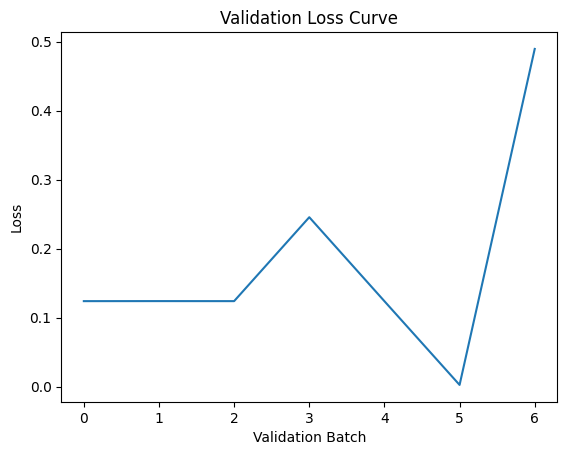

Validation Accuracy: 17.00%
Average Validation Loss: 0.1761


In [36]:
total_loss = 0
losses = []
correct = 0
total = 0
import matplotlib.pyplot as plt
siamese_net.eval()
with torch.no_grad():
    for i, data in enumerate(val_dataloader, 0): # Loading data from the val_dataloader
        #print(data)
        inputs1, inputs2, labels = data
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        distances = F.pairwise_distance(outputs1, outputs2)
        predicted = (distances < 0.05).float()  # Adjust the threshold distance between the 2 ouputs in tensor format for classification as same image or different
        predicted = predicted.view(labels.size()) # Make the label and predicted tensors of the same shape
        total += labels.size(0)
        correct += (predicted == labels).sum().item() # Counting the number of correct outputs
        loss = criterion(outputs1, outputs2, labels)
        total_loss += loss.item()
        losses.append(loss.item())

avg_loss = total_loss / (i + 1)

# Plot the loss curve
plt.figure()
plt.plot(losses)
plt.xlabel("Validation Batch")
plt.ylabel("Loss")
plt.title("Validation Loss Curve")
plt.show()

# Print validation accuracy and loss
print(f"Validation Accuracy: {100 * correct / total:.2f}%") # Predicting the accuracy on validation dataset
print(f"Average Validation Loss: {avg_loss:.4f}")

#### Testing the data using the test set

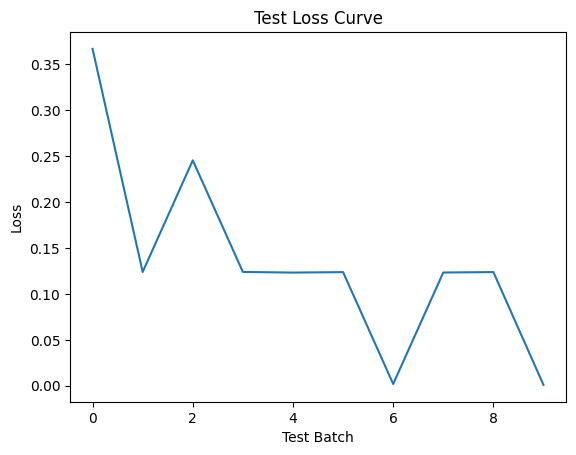

Test Accuracy: 18.33%
Average Test Loss: 0.1358


In [37]:
correct = 0
total = 0
total_loss = 0
losses = []
siamese_net.eval()

with torch.no_grad(): # Clearing all the accumulated gradient
    for i, data in enumerate(test_dataloader, 0):
        inputs1, inputs2, labels = data
        outputs1, outputs2 = siamese_net(inputs1, inputs2)
        distances = F.pairwise_distance(outputs1, outputs2)
        predicted = (distances < 0.05).float()  # Adjust the threshold distance between the 2 ouputs in tensor format for classification as same image or different
        total += labels.size(0)
        predicted = predicted.view(labels.size())  # Make the label and predicted tensors of the same shape
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs1, outputs2, labels)
        total_loss += loss.item()
        losses.append(loss.item())


avg_loss = total_loss / (i + 1)

# Plot the loss curve
plt.figure()
plt.plot(losses)
plt.xlabel("Test Batch")
plt.ylabel("Loss")
plt.title("Test Loss Curve")
plt.show()

# Print validation accuracy and loss
print(f"Test Accuracy: {100 * correct / total:.2f}%") # Predicting the accuracy on test dataset
print(f"Average Test Loss: {avg_loss:.4f}")

### References

1.  ChatGPT
2.  StackOverflow
3.  https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
4.  https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

